In [8]:
!pip install opencv-contrib-python==4.8.0.76

In [9]:
import cv2
cv2.__version__

'4.8.0'

In [10]:
import cv2.aruco as aruco
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Define parameters for the CharucoBoard
num_squares_x = 7
num_squares_y = 10
square_length = 0.04  # length of each square side in meters
marker_length = 0.02  # length of the markers in meters
dictionary = aruco.getPredefinedDictionary(aruco.DICT_5X5_1000)  # you can choose a different dictionary

# Define a nonzero start ID for aruco markers
start_id = 200

# Create CharucoBoard with a nonzero start ID
board1 = aruco.CharucoBoard(
    (num_squares_x, num_squares_y),
    squareLength=square_length,
    markerLength=marker_length,
    dictionary=dictionary,
    ids=np.arange(start_id, start_id+num_squares_x*num_squares_y//2, dtype=np.int32)
)

board2 = aruco.CharucoBoard(
    (num_squares_x, num_squares_y),
    squareLength=square_length,
    markerLength=marker_length,
    dictionary=dictionary,
    ids=board1.getIds() + len(board1.getIds()),
)

In [12]:
dictionary = board1.getDictionary()

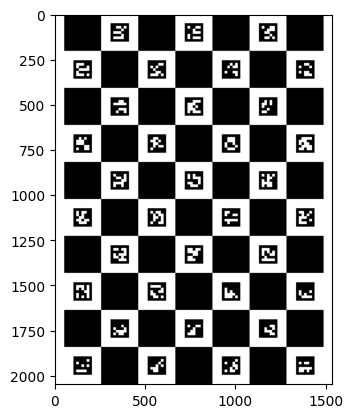

In [13]:
img1 = board1.generateImage((1536, 2048), marginSize=0)
plt.imshow(img1, cmap='gray')

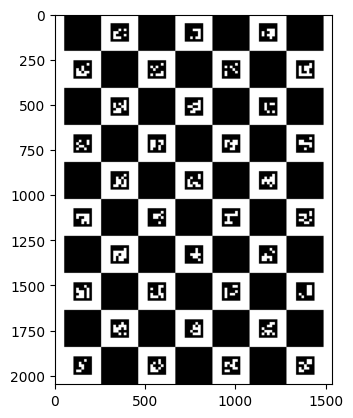

In [14]:
img2 = board2.generateImage((1536, 2048), marginSize=0)
plt.imshow(img2, cmap='gray')

In [15]:
exp_type = "90degree"

In [23]:
hdrfiledir = "/home/yuruihan/DS-FaceScape/hdr_emitter/2023_12_30_ldr"

In [24]:
import os
# Vector to store 3D points 
obj_points = [] 
# Vector to store 2D points 
img_points = [] 
aruco_dict = dictionary
board1_file_list = []
for file in os.listdir(hdrfiledir):
    print(file)
    if file.endswith(".png"):
        print(file)
        img = cv2.imread(os.path.join(hdrfiledir, file))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        markerCorners1, markerIds1, rejectedImgPoints1 = cv2.aruco.detectMarkers(img, aruco_dict)
        if len(markerCorners1) == 0:
            continue
        retval, charuco_corners, charuco_ids = aruco.interpolateCornersCharuco(markerCorners1, markerIds1, gray, board1)
        if charuco_corners is not None and charuco_ids is not None:
            obj_point,img_point= board1.matchImagePoints(
                charuco_corners, charuco_ids,
            )

            obj_points.append(obj_point)
            img_points.append(img_point)
            print("add {}".format(file))

            # if len(obj_point) >= 6:

            #     obj_points.append(obj_point)
            #     img_points.append(img_point)
            #     print("add {}".format(file))
            #     print(len(obj_point))
            #     board1_file_list.append(file)

IMG_0001.png
IMG_0001.png
IMG_0008.png
IMG_0008.png
IMG_0015.png
IMG_0015.png


In [25]:
img_point[0]

NameError: name 'img_point' is not defined

In [ ]:
obj_point[0]

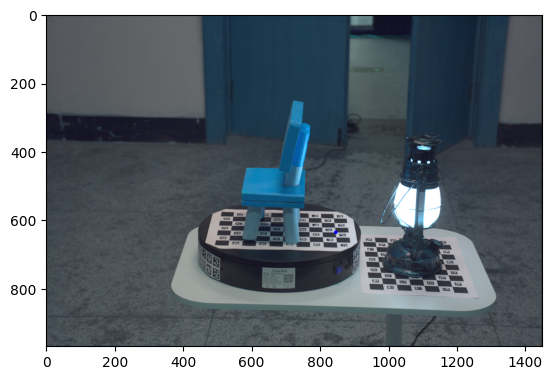

In [ ]:
#img_point 在IMG_0344.png 上画红圈标注出来
img = cv2.imread(os.path.join(hdrfiledir, "IMG_0344.png"))
img = cv2.resize(img, (0, 0), fx=0.25, fy=0.25)
img = cv2.circle(img, tuple([int(img_point[0][0][0]),int(img_point[0][0][1])]), 20, (255, 0, 0), -1)
plt.imshow(img)


In [ ]:
import os
# Vector to store 3D points 
obj_points2 = [] 
# Vector to store 2D points 
img_points2 = [] 
valid_count = 0
aruco_dict = dictionary
board2_file_list = []
for file in os.listdir(hdrfiledir):
    if file.endswith(".png"):
        img = cv2.imread(os.path.join(hdrfiledir, file))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        markerCorners2, markerIds2, rejectedImgPoints2 = cv2.aruco.detectMarkers(img, aruco_dict)
        if len(markerCorners2) == 0:
            continue
        retval, charuco_corners, charuco_ids = aruco.interpolateCornersCharuco(markerCorners2, markerIds2, gray, board2)
        if charuco_corners is not None and charuco_ids is not None:
            obj_point,img_point= board2.matchImagePoints(
                charuco_corners, charuco_ids,
            )
            valid_count += 1
            if len(obj_point) >= 6:

                obj_points2.append(obj_point)
                img_points2.append(img_point)
                print("add {}".format(file))
                board2_file_list.append(file)
print(valid_count)
            



add IMG_0204.png
add IMG_0239.png
add IMG_0260.png
add IMG_0267.png
add IMG_0274.png
add IMG_0281.png
add IMG_0295.png
add IMG_0302.png
add IMG_0309.png
add IMG_0344.png
16


In [ ]:
# 270
# camera_matrix_meta = np.array([[10899.24186336478, 0, 2889.208043628761], [0, 10899.24186336478, 1170.1156317786006], [0, 0, 1]])
# dist_coeffs_meta = np.array([0.2294113741077193,.6084733644953748,-3.4269276816682868,0.0007662236845471247,-0.020879623624284742,])
# 180
# camera_matrix_meta = np.array([[10837.380885854564, 0, 2917.179061415423], [0, 10837.380885854564, 1799.955656049973], [0, 0, 1]])
# dist_coeffs_meta = np.array([0.23032712238589098,1.198005506151870448,-6.0113878928312925,0.0023484040122812386,-0.004275325223644492,])

In [ ]:
# 读取json文件
import json
json_dir = "/home/yuruihan/DS-FaceScape/hdr_emitter/nerfstudio/nerfstudio/hdr_reality_room_12_07_{}".format(exp_type)

with open(json_dir + '/transforms.json', 'r') as f:
    camera_json = json.load(f)
    frame = camera_json['frames'][0]
    camera_matrix_meta = np.array([[frame["fl_x"],0,frame["cx"]],[0,frame["fl_y"],frame["cy"]],[0,0,1]])
    dist_coeffs_meta = np.array([frame["k1"],frame["k2"],frame["k3"],frame["p1"],frame["p2"]])

In [ ]:
ret, camera_matrix, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], camera_matrix_meta, dist_coeffs_meta)
ret2, camera_matrix2, dist_coeffs2, rvecs2, tvecs2 = cv2.calibrateCamera(obj_points2, img_points2, gray.shape[::-1], camera_matrix_meta, dist_coeffs_meta)

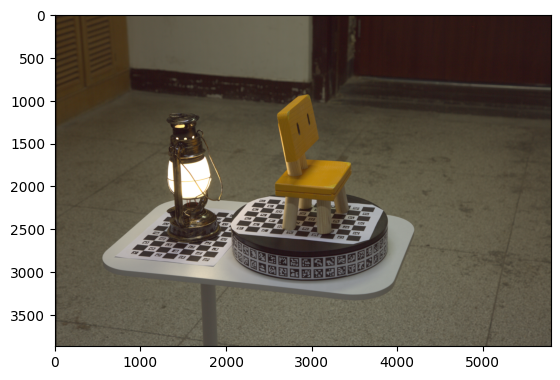

In [ ]:
file= "IMG_0302.png"
# match indice in board1_file_list and board2_file_list
board1_indice = board1_file_list.index(file)
board2_indice = board2_file_list.index(file)
file_path = os.path.join(hdrfiledir, file)
img = cv2.imread(filename=file_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

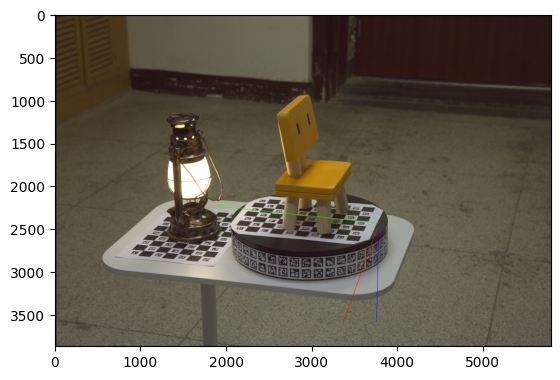

In [ ]:
axis_img1 = cv2.drawFrameAxes(img.copy(), camera_matrix_meta, dist_coeffs, rvecs[board1_indice], tvecs[board1_indice], 0.5)
plt.imshow(cv2.cvtColor(axis_img1, cv2.COLOR_BGR2RGB))

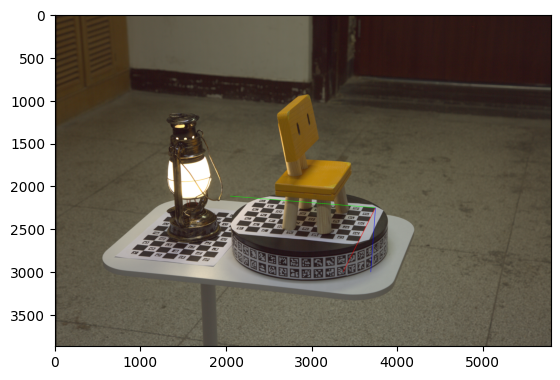

In [ ]:
pure_ret, pure_camera_matrix, pure_dist_coeffs, pure_rvecs, pure_tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None,None)
axis_img3 = cv2.drawFrameAxes(img.copy(), pure_camera_matrix, pure_dist_coeffs, pure_rvecs[board1_indice],  pure_tvecs[board1_indice], 0.5)
plt.imshow(cv2.cvtColor(axis_img3, cv2.COLOR_BGR2RGB))

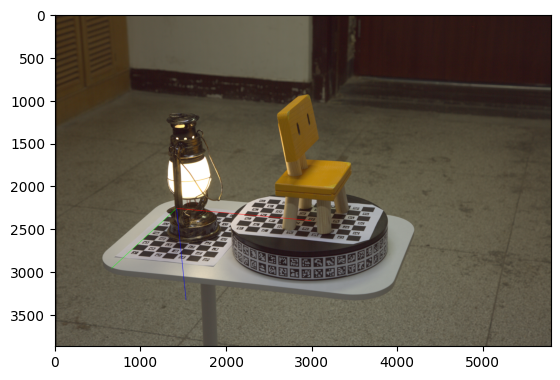

In [ ]:
axis_img2 = cv2.drawFrameAxes(img.copy(), camera_matrix_meta, dist_coeffs2, rvecs2[board2_indice], tvecs2[board2_indice], 0.5)
plt.imshow(cv2.cvtColor(axis_img2, cv2.COLOR_BGR2RGB))

In [ ]:
cv2.imwrite("axis_img1.png", axis_img1)
cv2.imwrite("axis_img2.png", axis_img2)
cv2.imwrite("axis_img3.png", axis_img3)